In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Defining all dataframes
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_EDV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
df_RR = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_D = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_P = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
df_EDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")

Q7. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

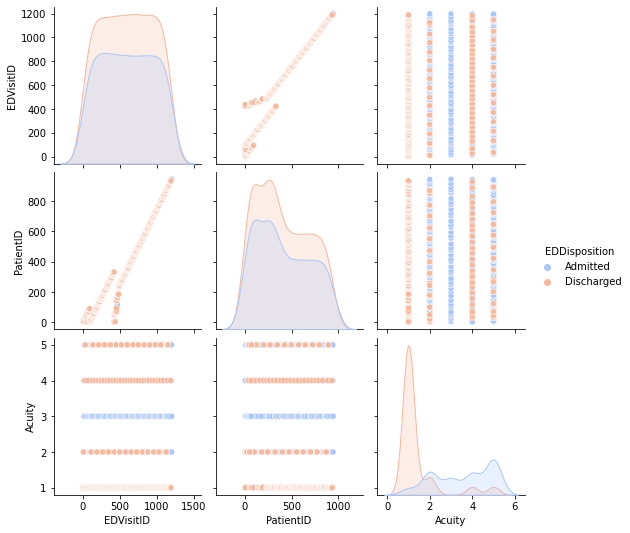

In [5]:
sns.pairplot(df_EDV, hue='EDDisposition',palette='coolwarm')

Q8. Create a bar chart between expectedLOS & Primary diagnosis.

In [6]:
x= df_RR["ExpectedLOS"]
y=df_RR["PrimaryDiagnosis"]


<BarContainer object of 720 artists>

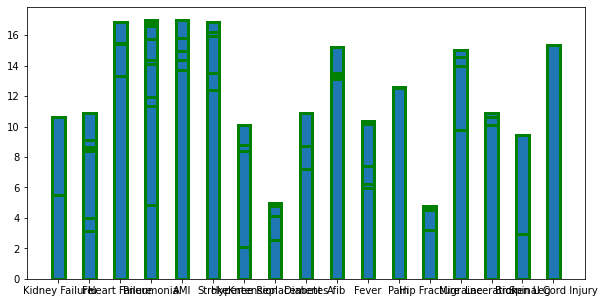

In [14]:
fig = plt.figure(figsize = (10, 5))
bar=plt.bar(y,x, width = 0.4, linewidth=3, edgecolor = "green")
bar

Q9. Get the list of patient ID's which are not there in ReadmissionRegistry.

In [18]:
merged = df_PA.merge(df_RR,on=["PatientID"])
merged

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,389,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,635,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,606,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,587,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,640,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,738,Konopelski,Group,1975-11-28 02:34:22.237,Female,White,English,521,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,739,Chandal,Group,1985-04-19 17:45:10.810,Female,White,English,548,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,740,Tiena,Mahomet,1960-07-23 09:04:25.637,Female,White,English,509,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,741,Rogahn,Group,1960-03-14 20:14:13.941,Female,White,English,605,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [23]:
result2 = df_RR[(~df_RR.PatientID.isin(merged.PatientID))]
result2

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag


Q19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [36]:
df_datetime = pd.DataFrame(data={}, columns=['date', 'time'])
df_datetime

,date,time


In [37]:
df_datetime['date'] = pd.to_datetime(df_RR['DischargeDate']).dt.date
df_datetime['time'] = pd.to_datetime(df_RR['DischargeDate']).dt.time

In [38]:
df_datetime

,date,time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


Q20. Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [24]:
df_RR.groupby(["Service", "PrimaryDiagnosis"]).count()["PatientID"]

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

Q31. Find the count of White Spanish Male.

In [41]:
df_PA[(df_PA['Gender']=='Male') & (df_PA['Race']=='White') & (df_PA['Language']=='Spanish') ]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
10,11,Dean,Kimberly,1972-02-22 19:23:49.981,Male,White,Spanish
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish
12,13,Skippie,Marriot,1978-05-12 20:12:54.106,Male,White,Spanish
13,14,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish
14,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish
15,16,Far,Pardon,1974-08-08 10:55:59.043,Male,White,Spanish
16,17,Gerhold,Kendall,1974-02-15 22:02:36.479,Male,White,Spanish
17,18,Sheena,Kevin,1983-01-20 20:40:26.024,Male,White,Spanish
18,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish
19,20,Megan,Walter,1960-02-10 19:04:57.032,Male,White,Spanish


Q32. Write a function to print the multipication table of the given number.

In [3]:
def mult_table(num):
    for i in range(1,11):
        print(i * num, end = '\t')

user_num = int(input("enter the number:  "))        
mult_table(user_num)

enter the number:  4
4	8	12	16	20	24	28	32	36	40	

Q33. Using a bar chart, which Service had the lowest count of Expected Mortality?

In [43]:
x = df_D["Service"]
y = df_D["ExpectedMortality"]

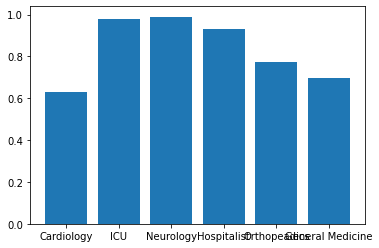

In [44]:
bar = plt.bar(x,y)

from the figure it shows that Cardiology has the least expectedmortality rate